# Write Efficiency
The purpose of this notebook is to get write efficiency, following Matt's work [here (login required)](https://zzz.physics.umn.edu/!cdms/cdms/k100/run_summary/run_76/write_efficiency).

In [1]:
#Imports
import sys
import numpy as np              #Will be used for binning
import pandas as pd             #Will be used for data structuring
import matplotlib.pyplot as plt #Basic plotting library
sys.path.append('../')
from R76Tools import *          #Tools written by me for, e.x., importing our files

#Constants
frittspath = "/data/chocula/fritts/data/k100proc/midasrq/byseries/"

In [2]:
#User-set Variables
datapath = frittspath
ser = ["07220916_2059","07220916_2200","07220917_1039","07220917_1225","07220917_2125","07220917_2155"]
lab = ["0V","-4V","-21V","-65V","-84V","-84V"]
NaI_ser = ser[1::2]
NaI_lab = lab[1::2] 

#Derived variables
_,z,_ = makechain_list(NaI_ser,path=datapath,filters=[fittingfilters,"PTOFamps0","PAWKr50","PAWKmax"],aliases=calibrationaliases,trees=["e","z","z4"])
z_all = pd.DataFrame(); #z4_all = pd.DataFrame()
for i,x in enumerate(z):
    z_all = pd.concat([z_all,x])
    #z4_all = pd.concat([z4_all,z4[i]])

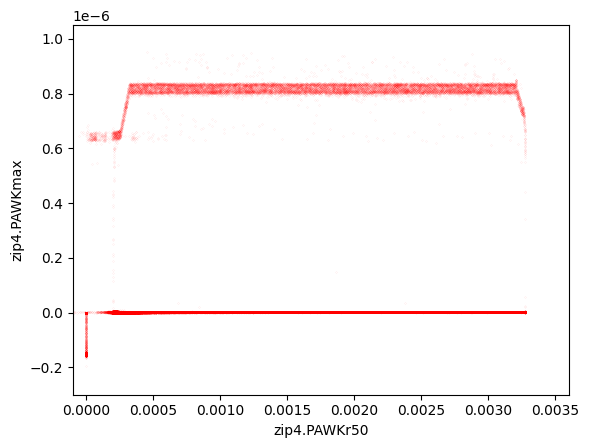

In [3]:
#Initial plotting
plt.scatter(z_all['zip4.PAWKr50'][z_all["crand"]],z_all['zip4.PAWKmax'][z_all["crand"]],color='red',s=0.001)
plt.xlabel("zip4.PAWKr50"); plt.ylabel("zip4.PAWKmax")
plt.xlim(-0.0001,0.0036)
plt.ylim(-0.3e-6,1.05e-6)
plt.show()

In [4]:
#Randoms
nrand = len(z_all[z_all["crand"]])
nrandhit = len(z_all[z_all["crand"] & (z_all["zip4.PAWKmax"] > 0.6e-6) & (z_all["zip4.PAWKr50"] > 0.00035) & (z_all["zip4.PAWKr50"]<0.003)])
twindow = 0.003 - 0.00035
rate_rand = np.log(nrand/(nrand-nrandhit))/twindow
print("Randoms:",rate_rand,"Hz")
#Triggered
timesec = 102291-89791+87895-55573+49158-3690
ntrig = len(z_all[~z_all["crand"] & (z_all["zip4.PAWKmax"]>0.6e-6)])
rate_trig = ntrig/timesec
print("Triggered:",rate_trig,"Hz")
#Efficiency
effic_write = rate_trig/rate_rand
print("Efficiency:",effic_write," ("+str(effic_write*100)+"%)")

Randoms: 11.846666136964098 Hz
Triggered: 10.236770406468047 Hz
Efficiency: 0.8641055878604668  (86.41055878604668%)
